<a href="https://colab.research.google.com/github/Stephen-Njuguna/Contraceptive-Future-Consumption-/blob/main/Capstone_Project_1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MODELING FUTURE CONTRACEPTIVE USE**

**OVERVIEW**

Contraceptive access is vital to safe motherhood, healthy families, and prosperous communities. In low- and middle-income countries (LMIC) around the world, health systems are often unable to accurately predict the quantity of contraceptives necessary for each health service delivery site. This research therefore aims to analyze factors affect delivery of contraceptives across Côte d’Ivoire (Ivory Coast) and build a model that predicts contraceptive use at over 150 sites.

Other objectives include:

- Identifying the most popular contraceptive product .
- Identifying the most visited site as per the different site types.
- Finding out the most preferred form of contraceptive method.
- Identifying the district with the highest population.
- Finding the stock distributed by region and product code.

## 1. Defining the Question

### a) Specifying the Data Analytic Question

Understanding the factors that affect delivery of contraceptives and 
using that knowledge to build  a model capable of predicting consumption of 11 contraceptives across 156 health service delivery sites in the public sector health system in Côte d’Ivoire.

### b) Defining the Metric for Success
Success shall be measured based on the algorithm that effectively predicts consumption with the lowest **RMSE**

### c) Understanding the context 
Contraceptive utilization helps individuals/couples avoid unwanted pregnancy. Beyond preventing unwanted pregnancy, contraceptive access is vital to safe motherhood and prosperous communities.  

It is important that contraceptives are widely available and easily accessible to anyone who is sexually active. According to the [UN Contraceptive use by method 2019 Data Booklet](https://www.un.org/development/desa/pd/sites/www.un.org.development.desa.pd/files/files/documents/2020/Jan/un_2019_contraceptiveusebymethod_databooklet.pdf),  Africa has by far the lowest percentage of women using contraceptives. To be specific, 214 million women of reproductive age in developing regions have an unmet need for contraception. 

One of the main reasons for limited access is that health systems in these countries are unable to predict the quantity of contraceptives necessary for each health service delivery site mainly due to inadequate systems and insufficient data. When too few supplies are ordered, service delivery sites run out limiting access to contraceptives and family planning. When too much product is ordered, unused contraceptives are wasted and left to expire.

Accurate prediction of contraceptive consumption can save lives, money, and time by ensuring health service delivery sites have what they need when they need it and by reducing waste in the supply chain.


### d) Recording the Experimental Design
1. Data Preparation
 - Loading Dependencies
 - Loading the Dataset
 - Dealing with Irrelevant Observations
 - Handling missing/duplicate values
 - Data Uniformity
 - Checking Outliers
3. Exploratory Data Analysis
 - Univariate analysis
 - Bivariate analysis
4. Modelling
 - Feature Engineering
 - Instantiating the Classifiers
 - Performance evaluation
 - Hyperparameter optimization
5. Performance Analysis
 - Assessing scores
6. Conclusions and Recommendations

### e) Data Relevance

Train Dataset is our main dataset.

Description of the variables in the primary dataset are as follows:

*  **Year**: year of the observation
*  **Month**: month of the observation
*  **Region**: higher level geographical area within Côte d'Ivoire
*  **District**: lower level geographical area within Côte d'Ivoire
*  **Site_code**: actual health service delivery site
*  **Product_code**: unique identifier for each commodity
*  **Stock_initial**: stock in hand of previous period. This is quantified in dispensing units
*  **Stock_received**: total quantity received in the last period. This is quantified in dispensing units
*  **Stock_distributed**{Target Variable}: quantity dispensed/consumed in the last reporting period. This is quantified in dispensing units
*  **Stock_adjustment**: all kinds of losses/ adjustments made at the facility
*  **Stock_end**: current physical count of stock in hand. This is quantified in dispensing units
*  **Average_monthly_consumption**: average monthly consumption for the last three months. This is quantified in dispensing units
*  **Stock_stockout_days**: total number of days facility was out of stock
*  **Stock_ordered**: the requested quantity. This is quantified in dispensing units.

## 2. Reading the Data

In [ ]:
#Importing libraries:

#1. Data Wrangling/Manipulation:
import pandas as pd 
import numpy as np 


#2. Data Visualization:
import seaborn as sns   
import matplotlib.pyplot as plt

#3. Feature Selection:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel

#4. Modelling:
import tensorflow as tf
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from lightgbm import LGBMRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge,Lasso,LassoLarsCV 
from xgboost import XGBRegressor

#5. Model Evaluation:
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score


#6. Removing Warnings:
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Loading the Datasets from the source i.e. csv
train = pd.read_csv('Train.csv')
annual_data = pd.read_csv('annual_cases.csv')
mon_data = pd.read_csv('monthly_cases.csv')
prod_data = pd.read_csv('product.csv')
serv_data = pd.read_csv('service_delivery_site_data.csv')



## 3. Checking the Data

#### Train Dataset

In [ ]:
# Determining the no. of records in our dataset(Train_data)
#
train.shape

(35753, 14)

In [ ]:
#Previewing train dataset 
train.head()

,year,month,region,district,site_code,product_code,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_stockout_days,stock_ordered
0,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,75,0,21,-54,0,18,0,100.0
1,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27132,3,0,3,0,0,2,0,10.0
2,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27000,0,75,22,0,53,9,0,0.0
3,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27137,2,0,0,0,2,0,0,0.0
4,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27138,45,0,2,0,43,1,0,0.0


In [ ]:
#Previewing service delivery site dataset 
serv_data.head()

,site_code,site_type,site_region,site_district,site_latitude,site_longitude
0,C1399,Health Center,ABIDJAN 2,COCODY-BINGERVILLE,5.352721,-3.940210
1,C4001,Hospital,INDENIE-DJUABLIN,ABENGOUROU,6.730937,-3.483863
2,C1004,Hospital,AGNEBY-TIASSA-ME,AGBOVILLE,5.928340,-4.211450
3,C4002,Hospital,BOUNKANI-GONTOUGO,BONDOUKOU,8.041860,-2.798370
4,C2002,Hospital,MARAHOUE,BOUAFLE,6.984120,-5.751980


In [ ]:
train.duplicated().sum()

0

In [ ]:
#Previewing product dataset 
prod_data.head()

,product_code,product_type,product_name
0,AS17005,Female Condom,PRESERVATIF FEMININ UNITE
1,AS46000,Male Condom,PRESERVATIF MASCULIN BTE/144 BOITE
2,AS27139,Emergency Contraceptive (Pill),LEVONORGESTREL 1.5 MG CP BOITE
3,AS27137,Contraceptive Implant,JADELLE (IMPLANT + TROCARD) 150 µG BTE/10 BOITE
4,AS27138,Contraceptive Implant,IMPLANON IMPLANT 68 MG BTE/1 BOITE


In [ ]:
#Previewing monthly_cases dataset 
mon_data.head()

,district,month,year,implant_women_old,implant_women_new,injection2_women_old,injection2_women_new,injection3_women_old,injection3_women_new,pill_women_old,pill_women_new,iud_women_old,iud_women_new,iud_number_dispensed,implant_number_dispensed,injection2_number_dispensed,injection3_number_dispensed,pill_number_dispensed,iud_number_received,implant_number_received,injection2_number_received,injection3_number_received,pill_number_received,iud_stock_end,implant_stock_end,injection2_stock_end,injection3_stock_end,pill_stock_end
0,ABENGOUROU,1,2019,478.0,91.0,103.0,17.0,1278,296,195.0,34.0,NaN,NaN,NaN,75.0,44.0,1082.0,2542.0,NaN,319.0,33.0,1244.0,2846.0,NaN,422.0,NaN,1501.0,3466.0
1,ABENGOUROU,2,2019,340.0,81.0,126.0,10.0,1237,253,187.0,19.0,9.0,1.0,1.0,66.0,38.0,813.0,557.0,20.0,255.0,17.0,1174.0,2608.0,NaN,394.0,NaN,1535.0,3327.0
2,ABENGOUROU,3,2019,367.0,59.0,14.0,7.0,1300,224,147.0,26.0,NaN,5.0,5.0,47.0,42.0,819.0,665.0,50.0,214.0,50.0,1050.0,2148.0,NaN,340.0,NaN,1187.0,3636.0
3,ABENGOUROU,4,2019,583.0,46.0,6.0,1.0,1296,336,200.0,35.0,NaN,3.0,1.0,36.0,66.0,874.0,404.0,45.0,217.0,55.0,824.0,1787.0,NaN,340.0,NaN,889.0,2727.0
4,ABENGOUROU,5,2019,407.0,60.0,46.0,20.0,1356,281,156.0,24.0,NaN,1.0,1.0,71.0,47.0,813.0,545.0,14.0,321.0,256.0,1032.0,1635.0,NaN,355.0,NaN,604.0,1668.0


In [ ]:
#Previewing annual cases dataset 
annual_data.head()

,Unnamed: 0,district,year,implant_women_old,implant_women_new,injection2_women_old,injection2_women_new,injection3_women_old,injection3_women_new,pill_women_old,pill_women_new,iud_women_old,iud_women_new,iud_number_dispensed,implant_number_dispensed,injection2_number_dispensed,injection3_number_dispensed,pill_number_dispensed,iud_number_received,implant_number_received,injection2_number_received,injection3_number_received,pill_number_received,iud_stock_end,implant_stock_end,injection2_stock_end,injection3_stock_end,pill_stock_end
0,0,ABENGOUROU,2018,3298.0,965.0,2997.0,749.0,10892,2609,1867.0,425.0,117.0,15.0,26.0,823.0,3681.0,7082.0,6893.0,673.0,2435.0,8799.0,12890.0,35961.0,NaN,3167.0,NaN,16041.0,48097.0
1,1,ABENGOUROU,2017,2597.0,698.0,2125.0,588.0,9939,2480,1835.0,400.0,34.0,22.0,15.0,483.0,2894.0,6460.0,6339.0,544.0,1760.0,9920.0,12727.0,31260.0,NaN,2617.0,NaN,16403.0,41079.0
2,2,ABENGOUROU,2016,865.0,408.0,2616.0,786.0,8407,2440,2675.0,439.0,20.0,24.0,19.0,438.0,3167.0,5394.0,5982.0,436.0,1503.0,11407.0,12666.0,28256.0,NaN,1671.0,NaN,8561.0,20878.0
3,3,ABOBO EST,2018,4041.0,2234.0,2200.0,583.0,13504,3940,2959.0,673.0,383.0,180.0,155.0,2372.0,878.0,9512.0,5234.0,1154.0,3309.0,2241.0,9914.0,7426.0,NaN,3092.0,NaN,9359.0,9046.0
4,4,ABOBO EST,2017,1954.0,2491.0,1768.0,214.0,10745,2389,3506.0,679.0,147.0,259.0,258.0,3066.0,1805.0,8939.0,6957.0,2780.0,4009.0,5846.0,11784.0,13191.0,NaN,2596.0,NaN,6359.0,11711.0


In [ ]:
#Merging Product dataset, Service delivery site data with the train dataset
train = train.merge(serv_data[['site_code','site_type','site_latitude','site_longitude']],on='site_code')
train = train.merge(prod_data[['product_code','product_type','product_name']],on='product_code')

In [ ]:
#Dropping stock_stockout_days column since all observations were null
train.drop(['stock_stockout_days'],axis=1,inplace=True)

In [ ]:
# Checking whether each column has an appropriate datatype after merging 
#
train.dtypes

year                             int64
month                            int64
region                          object
district                        object
site_code                       object
product_code                    object
stock_initial                    int64
stock_received                   int64
stock_distributed                int64
stock_adjustment                 int64
stock_end                        int64
average_monthly_consumption      int64
stock_ordered                  float64
site_type                       object
site_latitude                  float64
site_longitude                 float64
product_type                    object
product_name                    object
dtype: object

In [ ]:
#Merging year and month,then convert to datatime data type
train['date'] = train['year'].astype(str) + '-' + train['month'].astype(str)

train['date'] = pd.to_datetime(train['date'],yearfirst=True)
train = train.set_index('date')
train.head()

,year,month,region,district,site_code,product_code,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_ordered,site_type,site_latitude,site_longitude,product_type,product_name
date,,,,,,,,,,,,,,,,,,
2019-01-01,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,75,0,21,-54,0,18,100.0,Hospital,6.730937,-3.483863,Injectable Contraceptive,NORISTERAT 200 MG AMP INJ BTE/100 BOITE
2019-02-01,2019,2,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,0,0,0,0,0,18,100.0,Hospital,6.730937,-3.483863,Injectable Contraceptive,NORISTERAT 200 MG AMP INJ BTE/100 BOITE
2019-03-01,2019,3,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,0,100,0,0,100,7,0.0,Hospital,6.730937,-3.483863,Injectable Contraceptive,NORISTERAT 200 MG AMP INJ BTE/100 BOITE
2019-04-01,2019,4,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,100,0,2,0,98,1,0.0,Hospital,6.730937,-3.483863,Injectable Contraceptive,NORISTERAT 200 MG AMP INJ BTE/100 BOITE
2019-05-01,2019,5,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,98,0,31,0,67,11,0.0,Hospital,6.730937,-3.483863,Injectable Contraceptive,NORISTERAT 200 MG AMP INJ BTE/100 BOITE


In [ ]:
#Checking for duplicates 
train.duplicated().sum()

0

In [ ]:
#Checking for missing values 
train.isnull().sum()

year                             0
month                            0
region                           0
district                         0
site_code                        0
product_code                     0
stock_initial                    0
stock_received                   0
stock_distributed                0
stock_adjustment                 0
stock_end                        0
average_monthly_consumption      0
stock_ordered                  763
site_type                        0
site_latitude                    0
site_longitude                   0
product_type                     0
product_name                     0
dtype: int64

In [ ]:
#Dealing with missing values 
# Dropping all the rows with missing values 
train.dropna(inplace= True)

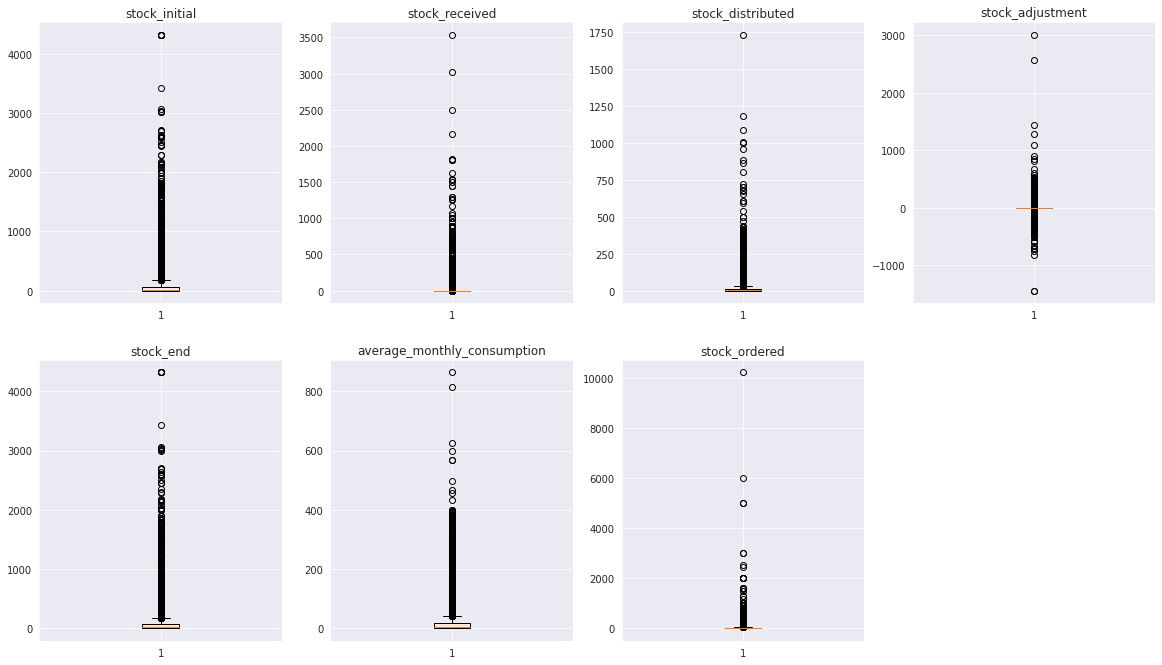

In [ ]:
#Checking for outliers 
Train_Numerics = {'stock_initial': 1, 'stock_received': 2, 'stock_distributed': 3,'stock_adjustment': 4,
              'stock_end': 5, 'average_monthly_consumption': 6,
              'stock_ordered': 7}

plt.figure(figsize=(20,30))

#Visualizing the Information on a boxplot:
for variable,i in Train_Numerics.items():
  plt.subplot(5,4,i)
  plt.boxplot(train[variable])
  plt.title(variable)
plt.show()

Our dataset has outliers but after further investigations we realised they are true observations 

## 4. Exploratory Analysis

### Univariate Analysis

In [ ]:
#Statistical summary 
train.describe()

,year,month,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_ordered,site_latitude,site_longitude
count,34990.000000,34990.000000,34990.000000,34990.000000,34990.000000,34990.000000,34990.000000,34990.000000,34990.000000,34990.000000,34990.000000
mean,2017.444098,6.157073,63.360789,14.958131,14.892112,0.975336,64.402143,14.722006,26.658102,6.544934,-5.002917
std,1.020275,3.433967,169.464370,71.062948,40.092218,38.135708,171.681322,32.724458,107.166082,1.409089,1.321300
min,2016.000000,1.000000,0.000000,0.000000,0.000000,-1440.000000,0.000000,0.000000,0.000000,4.410880,-8.412813
25%,2017.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.352146,-6.047720
50%,2017.000000,6.000000,12.000000,0.000000,1.000000,0.000000,13.000000,3.000000,0.000000,6.187810,-4.573300
75%,2018.000000,9.000000,69.000000,0.000000,13.000000,0.000000,70.000000,16.000000,20.000000,7.387150,-3.990899
max,2019.000000,12.000000,4320.000000,3534.000000,1728.000000,3003.000000,4320.000000,864.000000,10240.000000,10.495000,-2.798370


From the summary, majority of the Stocks had a minimum reporting value of 0. This can highly be due to the "Invalid 0 values". 
Eg: Stock_distributed for a contraceptive product at a service delivery site is reported in a given month as '0', even though stock_initial was above 0 and stock_distributed is historically well above 0.

Also, not all sites report all data each month. There are cases in the train data where the Côte d’Ivoire eLMIS system records a '0' value that may in fact represent a "non-reported" value or a value entered by a user for convenience. In such an instance, these ‘0’ values do not reflect actual observed values.

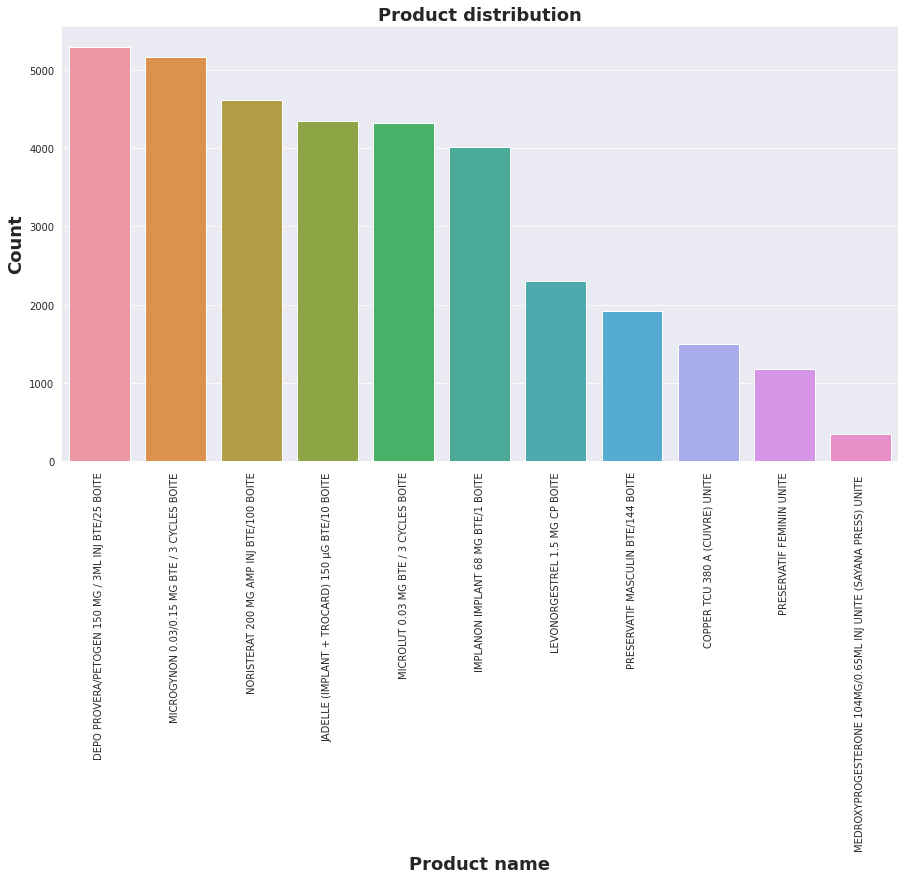

In [ ]:
#Plotting Products distribution
fontsize = 18
plt.figure(figsize=(15,8))
sns.countplot(train['product_name'],data= train, order = train['product_name'].value_counts().index)
plt.title('Product distribution',weight= 'bold',fontsize= fontsize)
plt.xlabel('Product name',weight='bold',fontsize= fontsize)
plt.ylabel('Count',weight='bold',fontsize= fontsize)
plt.xticks(rotation=90)
plt.show()

 The most preferred Injectable is the DEPO PROVERA/PETOGEN 150MG followed by Contraceptive Pill MICROGYNON 0.030.15 MG BTE.

DEPO PROVERA is likely prefered because of its availability in the market as compared  to the other 2 contraceptives: SAYANA PRESS 104MG and NORISTERAT 200MG. 

The unpopularity of SAYANA PRESS is because of its availability only  in certain clinics despite being registered for use in Côte d’Ivoire as of 2013 but still not permitted to be sold commercially. Being that the administration of SAYANA PRESS requires minimal training, it is especially suitable for use in rural areas, which are often underserved in Côte d’Ivoire ([Côte d’Ivoire Private Health Sector Assessment](https://shopsplusproject.org/sites/default/files/resources/C%C3%B4te%20d%E2%80%99Ivoire%20Private%20Health%20Sector%20Assessment_%20Family%20Planning_0.pdf) pg 29)
 
In regards to Contraceptive Pills, the popularity of  MICROGYNON  is due to its relatively low retail  price of USD 1.03 as compared to others which retail for as high as $19.26. The fair prices are mainly as a result of  a public-private partnership between USAID and Bayer Healthcare ([Côte d’Ivoire Private Health Sector Assessment](https://shopsplusproject.org/sites/default/files/resources/C%C3%B4te%20d%E2%80%99Ivoire%20Private%20Health%20Sector%20Assessment_%20Family%20Planning_0.pdf) pg 27)


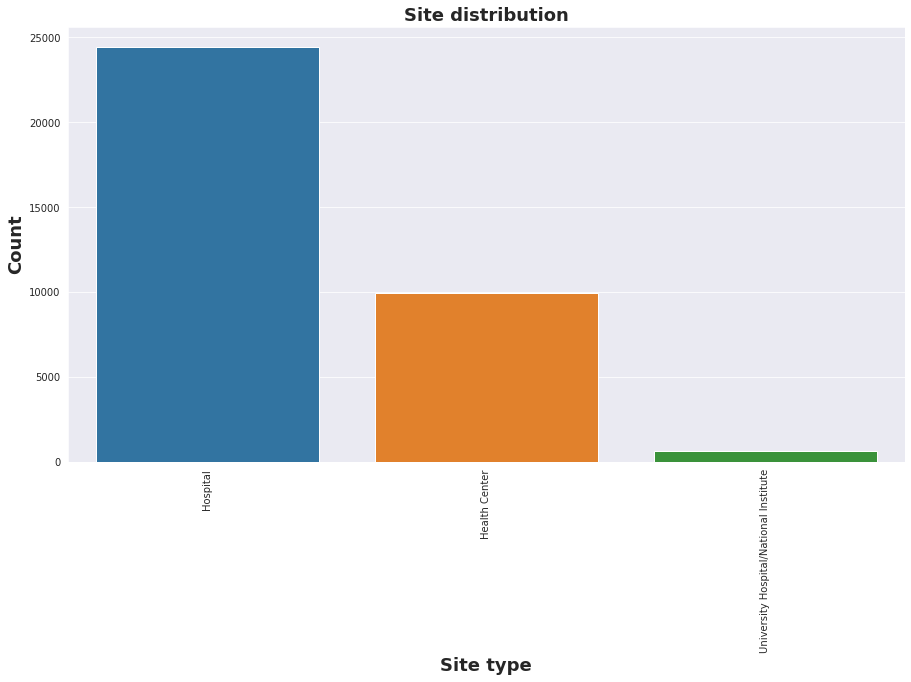

In [ ]:
#Plotting site ditribution 
fontsize = 18
plt.figure(figsize=(15,8))
sns.countplot(train['site_type'],data= train, order = train['site_type'].value_counts().index)
plt.title('Site distribution',weight= 'bold',fontsize= fontsize)
plt.xlabel('Site type',weight = 'bold',fontsize= fontsize)
plt.ylabel('Count',weight='bold',fontsize= fontsize)
plt.xticks(rotation=90)
plt.show()

According to the [Côte d’Ivoire Private Health Sector Assesment](https://shopsplusproject.org/sites/default/files/resources/C%C3%B4te%20d%E2%80%99Ivoire%20Private%20Health%20Sector%20Assessment_%20Family%20Planning_0.pdf) , the provision of care is dominated by the public sector. 

There are three levels of service delivery facilities in the public sector: 
 - Level 1: Public primary health care institutions
 - Level 2: General,Regional, and Specialized hospitals at the secondary level
 - Level 3: University teaching hospitals and Specialized health institutes at the Tertiary Level

The majority of health facilities in the public sector are categorized as Level 1 and Level 2.

From the data, Hospitals are the most popular sites for service delivery as they mainly fall under Level 1 and 2

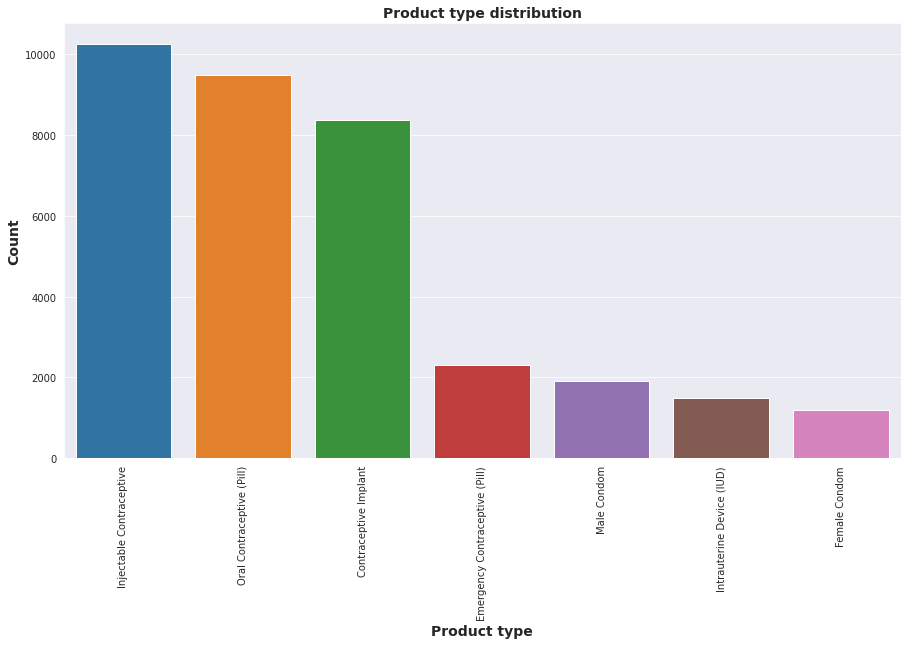

In [ ]:
#Product type distribution 
fontsize = 14
plt.figure(figsize=(15,8))
sns.countplot(train['product_type'],data= train, order = train['product_type'].value_counts().index)
plt.title('Product type distribution',weight= 'bold',fontsize= fontsize)
plt.xlabel('Product type',weight = 'bold',fontsize= fontsize)
plt.ylabel('Count', weight = 'bold',fontsize= fontsize)
plt.xticks(rotation=90)
plt.show()

In Côte d’Ivoire, there is heavy reliance on Donor financing and Donations for Family planning products.

The private sector serves the largest number of modern method users in Côte d’Ivoire and within the private sector, pharmacies are the largest private source of contraceptive methods (Côte d’Ivoire DHS 2011/12)

Referencing the [Côte d’Ivoire Private Health Sector Assessment](https://shopsplusproject.org/sites/default/files/resources/C%C3%B4te%20d%E2%80%99Ivoire%20Private%20Health%20Sector%20Assessment_%20Family%20Planning_0.pdf), the proportional value of donated contraceptive methods as of 2017 was as follows:
 - 32% ($3.6M) for male and female condoms

 - 27% ($3.1M) for injectibles

 - 21% ($2.4M) for implants

 - 18% ($2.0M) for oral pills

 - 2% ($0.2M) for Emergency Contraceptives

 - less than 1% for IUDs and other methods.

As much as Male and Female Condoms have the largest donor share, Injectable contraceptives  are the most popular birth control method followed by Oral contraceptive pills  as they are considered long acting, easy to administer and use. One benefit Injectables have over Oral Contraceptive Pills is that they are more discreet and do not require daily routines. 


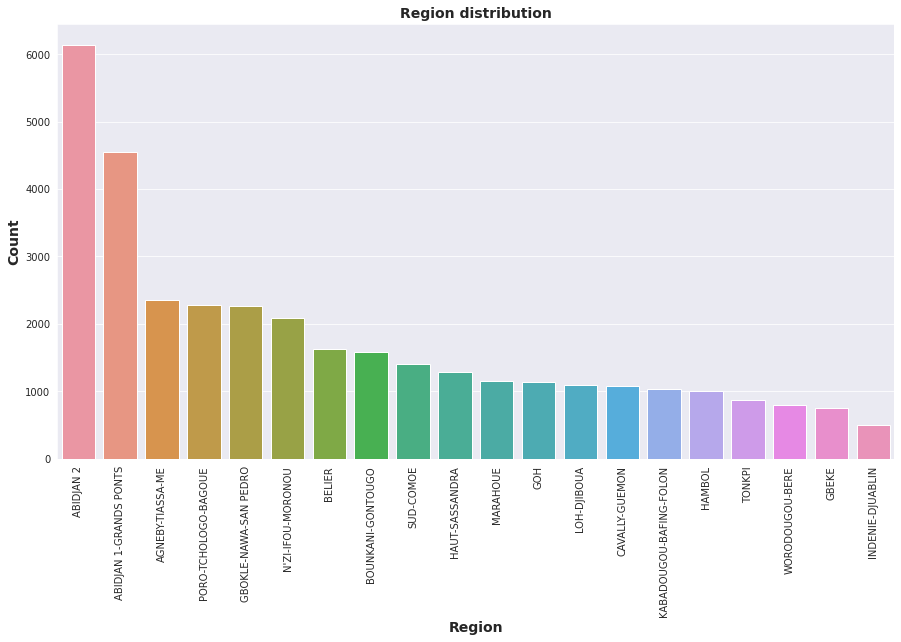

In [ ]:
#Plotting region ditribution 
fontsize = 14
plt.figure(figsize=(15,8))
sns.countplot(train['region'],data= train, order = train['region'].value_counts().index)
plt.title('Region distribution',weight= 'bold',fontsize= fontsize)
plt.xlabel('Region',weight = 'bold',fontsize= fontsize)
plt.ylabel('Count', weight = 'bold',fontsize= fontsize)
plt.xticks(rotation=90)
plt.show()

There are currently 31 [Regions](https://en.wikipedia.org/wiki/Regions_of_Ivory_Coast)  in  Ivory Coast. Two areas of the country, the autonomous districts of [Abidjan](https://en.wikipedia.org/wiki/Abidjan) and [Yamoussoukro](https://en.wikipedia.org/wiki/Yamoussoukro), are not divided into regions. 

Abidjan, the Region with the highest samples had a population of 4,707,404 , 20 percent of the overall population of the country as per the  2014 census while the region with the lowest number of samples [Indénié-Djuablin](https://en.wikipedia.org/wiki/Ind%C3%A9ni%C3%A9-Djuablin) had a population of  560,432.

Because Abidjan is the largest city in the country and the center of its economic activity, a high sample of 6,145 is mainly attributable to the numerous health centers and pharmacies available.

### Bivariate Analysis

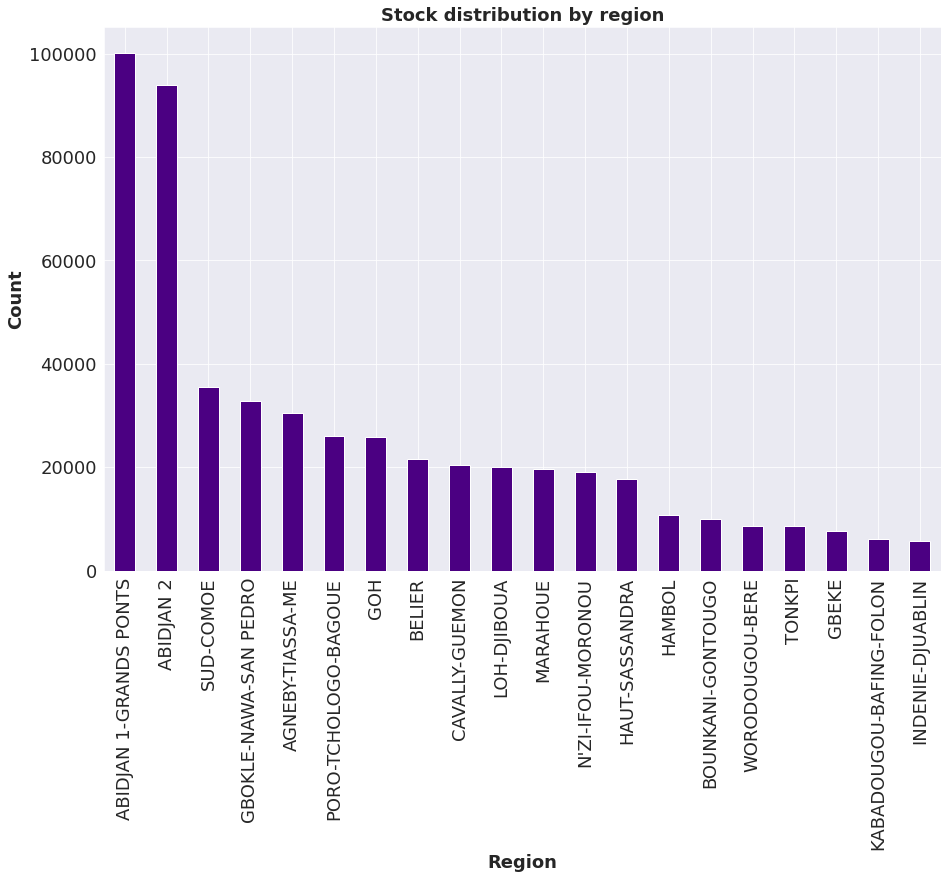

In [ ]:
#Plotting stock distribution by region
fontsize = 18
region = train.groupby('region')['stock_distributed'].sum().sort_values(ascending=False)
region.plot(kind='bar', figsize=(15,10), color="indigo", fontsize= fontsize);
plt.title('Stock distribution by region' ,weight ='bold',fontsize= fontsize)
plt.xlabel('Region' ,weight='bold',fontsize= fontsize)
plt.ylabel('Count', weight= 'bold',fontsize= fontsize)
plt.show()

Abidjan, the Region with the highest samples had a population of 4,707,404 , 20 percent of the overall population of the country as per the 2014 census while the region with the lowest number of samples Indénié-Djuablin had a population of 560,432.

Stock is distributed based on demographic.

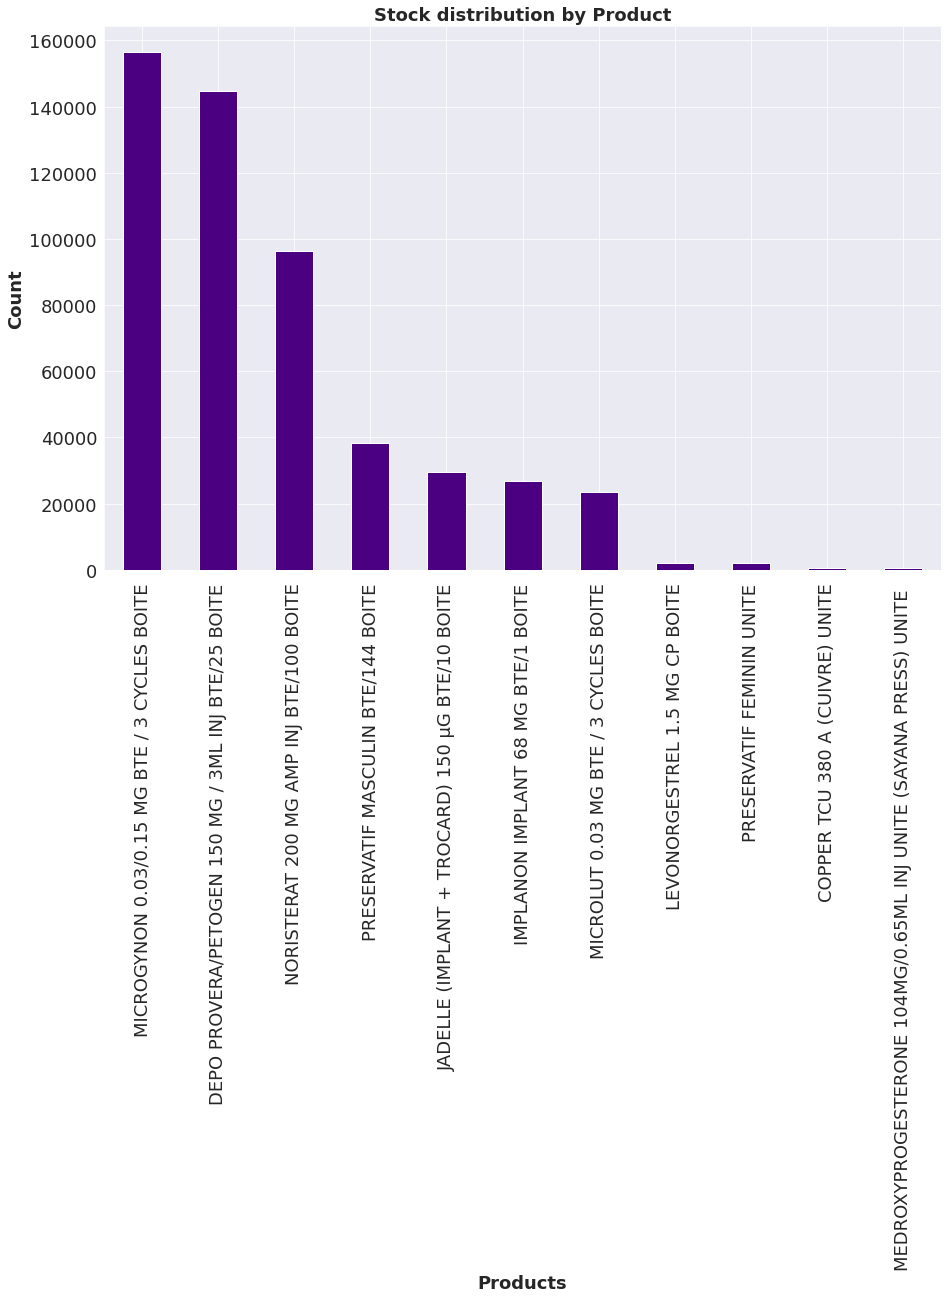

In [ ]:
#Plotting stock distribution by product name
fontsize = 18
region = train.groupby('product_name')['stock_distributed'].sum().sort_values(ascending=False)
region.plot(kind='bar', figsize=(15,10), color="indigo", fontsize= fontsize);
plt.title('Stock distribution by Product' ,weight ='bold',fontsize= fontsize)
plt.xlabel('Products' ,weight='bold',fontsize= fontsize)
plt.ylabel('Count', weight= 'bold',fontsize= fontsize)
plt.show()

MICROGYNON 0.03/0.15 MG BTE / 3 CYCLES BOITE is the most stocked product and MEDROXYPROGESTERONE 104MG/0.65ML INJ UNITE (SAYANA PRESS) UNITE  is the least stocked product

<function matplotlib.pyplot.show>

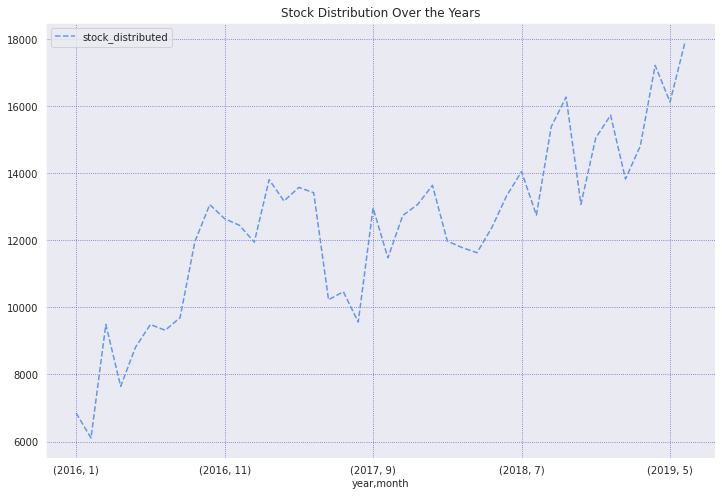

In [ ]:
#Stock distribution trend chart
#Finding the monthly stock distribution with respect to each year:
stock_distributed_monthly = train.groupby(['year','month']).stock_distributed.sum()
stock_distributed_monthly

#Plotting the trend:
plt.figure(figsize= (12, 8))
stock_distributed_monthly.plot(x = 'Years', y = 'Stock DIstributed', kind = 'line', color = 'cornflowerblue', linestyle = 'dashed')
plt.grid(True,  color = 'slateblue', linestyle = ':')
plt.title("Stock Distribution Over the Years")
plt.legend(loc = 2)
plt.show

In as much as contraceptive prevalence rate (mCPR) among women aged 15-49 has remained one of the lowest and the percentage of women with an unmet need for contraception remained one of the highest in sub-Saharan Africa, the overall contraceptive prevalence in Côte d’Ivoire  has been relatively increasing over the years(2016-2019) 

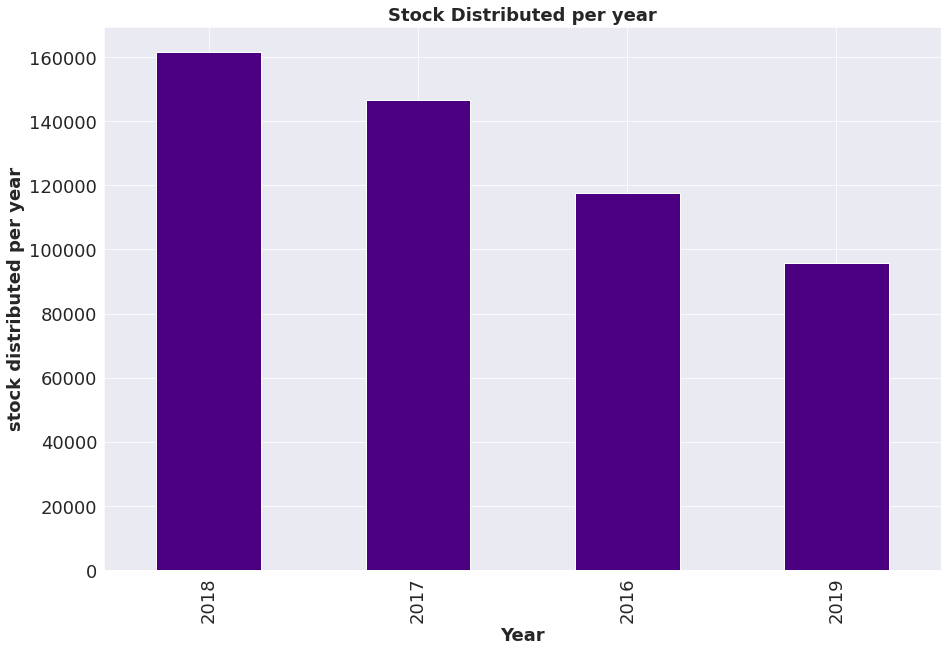

In [ ]:
#Finding the monthly stock distribution with respect to each year:
stock_distributed_monthly = train.groupby(['year']).stock_distributed.sum().sort_values(ascending=False)
stock_distributed_monthly.plot(kind='bar', figsize=(15,10), color="indigo", fontsize= fontsize)
plt.title('Stock Distributed per year',weight ='bold',fontsize= fontsize)
plt.xlabel('Year',weight ='bold',fontsize= fontsize)
plt.ylabel('stock distributed per year',weight ='bold',fontsize= fontsize)
plt.show() 

Stock distribution has increased over the years.

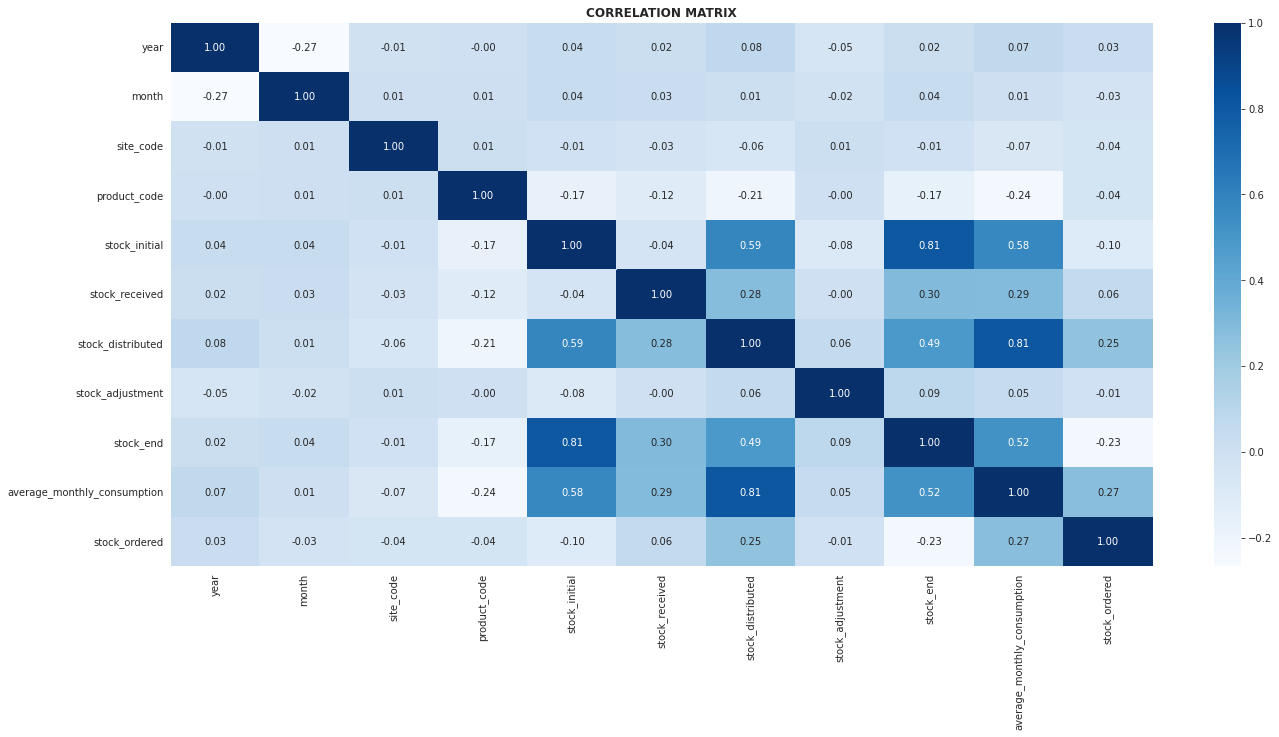

In [ ]:
#To check for correlation between the variables:
plt.figure(figsize = (22, 10))
corr = train_eda.corr(method = 'spearman')
sns.heatmap(corr, cmap = 'Blues', annot = True, fmt=".2f")
plt.title('CORRELATION MATRIX', y=1.5,weight='bold')
plt.show()

Average_monthly consumption has a strong postive 
correlation of 0.81 to stock_distributed. 

Stock_intial has a modarate positive correlation of 0.59 to stock_distributed.

Stock_end has a modarate positive correlation of 0.49 to stock_distributed.

Stock_adjusted has a weak positive correlation of 0.06 to stock_distributed.

## Feature Engineering

In [ ]:
#Label Encoding 
from sklearn.preprocessing import LabelEncoder 
en = LabelEncoder()
train['product_code'] = en.fit_transform(train['product_code'])
train['site_code'] = en.fit_transform(train['site_code'])

In [ ]:
#Dropping unnecessary columns
train.drop(['district','region','site_type','site_latitude','site_longitude','product_type','product_name'],axis=1,inplace=True)

In [ ]:
train.head(1)

,year,month,site_code,product_code,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_ordered
date,,,,,,,,,,,
2019-01-01,2019,1,119,5,75,0,21,-54,0,18,100.0


### Feature selection

ExtraTrees Regressor

[0.0160922  0.02114601 0.02810841 0.03362017 0.13572904 0.03816298
 0.01668719 0.06503247 0.61620391 0.02921761]


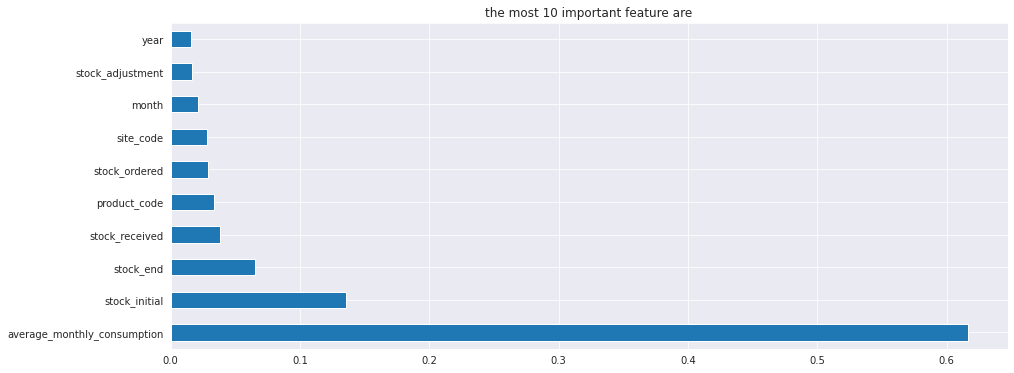

In [ ]:
# Feature Selection
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

X = train.drop('stock_distributed', axis=1)
y = train['stock_distributed']

from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X, y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('the most 10 important feature are')
plt.show()

Lasso Regression

In [ ]:
#Spliting traget and feature variables
X = train.drop('stock_distributed', axis=1)
y = train['stock_distributed']

In [ ]:
#Importling Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
#split train and test 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
#Hyperparameter tuing of lasso using pipeline 
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])


In [ ]:
#Cross validation using Gridsearch CV
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,1,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

search.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .................model__alpha=0.1;, score=-7.361 total time=   0.1s
[CV 2/5] END .................model__alpha=0.1;, score=-2.690 total time=   0.1s
[CV 3/5] END .................model__alpha=0.1;, score=-2.157 total time=   0.1s
[CV 4/5] END .................model__alpha=0.1;, score=-1.813 total time=   0.1s
[CV 5/5] END .................model__alpha=0.1;, score=-3.720 total time=   0.2s
[CV 1/5] END ................model__alpha=0.2;, score=-29.371 total time=   0.2s
[CV 2/5] END ................model__alpha=0.2;, score=-10.728 total time=   0.1s
[CV 3/5] END .................model__alpha=0.2;, score=-8.603 total time=   0.1s
[CV 4/5] END .................model__alpha=0.2;, score=-7.231 total time=   0.1s
[CV 5/5] END ................model__alpha=0.2;, score=-14.839 total time=   0.1s
[CV 1/5] END model__alpha=0.30000000000000004;, score=-66.033 total time=   0.2s
[CV 2/5] END model__alpha=0.30000000000000004;, s

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
#Getting best α parameter
search.best_params_

{'model__alpha': 0.1}

In [ ]:
#Getting the values of the coefficients of Lasso regression
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)


In [ ]:
#Getting varaible that have survived lasso Regression
np.array(X.columns)[importance>0]

array(['stock_initial', 'stock_received', 'stock_adjustment', 'stock_end',
       'average_monthly_consumption', 'stock_ordered'], dtype=object)

In [ ]:
#Viewing values that have been discarded by Lasso 
np.array(X.columns)[importance == 0]

array(['year', 'month', 'site_code', 'product_code'], dtype=object)

## 5. Implementing the Solution

In [ ]:
#Feature and target
y = train['stock_distributed']
X = train[['site_code','product_code','stock_initial', 'stock_received', 'stock_adjustment', 'stock_end',
       'average_monthly_consumption']]

In [ ]:
#Split train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

## Random Forest Regressor

In [ ]:
##RandomForest 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()

params = {'bootstrap': [True, False],
'max_depth': [10, 20, 30, 40, None],
'max_features': ['auto', 'sqrt'],
'min_samples_leaf': [1, 2, 4],
'min_samples_split': [2, 5, 10]}

grid_search = GridSearchCV(estimator=forest, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
#Hyperparameter tuning 
grid_search.fit(X_train,y_train)

In [ ]:
grid_search.best_params_

In [ ]:
#Training model with best parameters 
model = RandomForestRegressor(max_depth=10,max_features='auto'
        ,min_samples_leaf=1,min_samples_split=2,bootstrap=True,random_state=42)
#Fit train test to model 
model.fit(X_train,y_train)
#Predicting using trained model 
y_pred = model.predict(X_test)


In [ ]:
#Random forest model evaluation 
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

RandomForest = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Mean squared error (MSE): %.5f' % mean_squared_error(y_test, y_pred ))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Accuracy', (r2_score(y_pred, y_test )* 100).round(2))

Mean squared error (MSE): 288.47318
Mean Absolute Error (MAE): 5.003006491779213
Root Mean Squared Error (RMSE) : 16.984498155020447
Accuracy 74.6


## XGBoost Regressor

In [ ]:
#IMport XGboost model 
from xgboost import XGBRegressor

my_model = XGBRegressor()
#Fit model 
my_model.fit(X_train, y_train, verbose=False)

#Predict using trained model 
y_pred = my_model.predict(X_test)

[07:45:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#XGboost model evaluation 
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

XGboost = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Mean squared error (MSE): %.5f' % mean_squared_error(y_test, y_pred ))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Accuracy', (r2_score(y_pred, y_test )* 100).round(2))

Mean squared error (MSE): 243.47779
Mean Absolute Error (MAE): 6.256817235793172
Root Mean Squared Error (RMSE) : 15.60377479446775
Accuracy 77.35


## CATBoost Regressor

In [ ]:
# importing the catboost regressor

from catboost import CatBoostRegressor

cat = CatBoostRegressor(random_state=42, verbose=0)
cat.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = cat.predict(X_test)

In [ ]:
#CATboost model evaluation 
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

Catboost = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Mean squared error (MSE): %.5f' % mean_squared_error(y_test, y_pred ))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Accuracy', (r2_score(y_pred, y_test )* 100).round(2))

Mean squared error (MSE): 132.32818
Mean Absolute Error (MAE): 2.8072430952040652
Root Mean Squared Error (RMSE) : 11.503398608980996
Accuracy 89.25


## Neural Network 

In [ ]:
#Import Neural Network model
from sklearn.neural_network import MLPRegressor
#Using the classifier along with grid search:
mlp=MLPRegressor()
#Optimaztion 
param_grid = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,1), (50,50), (10,10)],
          'activation': ['relu','tanh','logistic', 'identity'],
          'alpha': [0.0001, 0.05],
          'learning_rate': ['constant','adaptive'],
          'solver': ['adam', 'sgd', 'lbfgs']}
        
       
#Creating grid search using 5-fold cross validation:
clf = GridSearchCV(mlp, param_grid = param_grid, cv= 5, verbose = 0, scoring = 'neg_mean_squared_error' )

#Fitting the grid search:
clf.fit(X_train, y_train)

#Get best parameter
clf.best_params_

In [ ]:
#Training MLP  model with best parameter
from sklearn.neural_network import MLPRegressor
#Using the classifier along with grid search:
mlp=MLPRegressor(hidden_layer_sizes=(20,20,20),activation='relu',alpha=0.0001,learning_rate='constant',solver='lbfgs',random_state=23)
#Fit model 
mlp.fit(X_train,y_train)
#Prediting with trained model
y_pred = mlp.predict(X_test)


In [ ]:
#Neural network model evaluation 
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

Neural_Networks = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Mean squared error (MSE): %.5f' % mean_squared_error(y_test, y_pred ))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Accuracy', (r2_score(y_pred, y_test )* 100).round(2))
print('******************************************************************')
#Checking for overfitting
print("Acc :", mlp.score(X_train,y_train)* 100)

Mean squared error (MSE): 0.16180
Mean Absolute Error (MAE): 0.1849590899436437
Root Mean Squared Error (RMSE) : 0.4022462698031839
Accuracy 99.99
******************************************************************
Acc : 99.98907431198549


## Model Evaluation 

In [ ]:
# Model Comparison:
Models =  pd.DataFrame({'Model': ['Random Forest', 'XGBoost', 'CATBoost', 
                               'Neural Network'],
                     'RMSE': [RandomForest, XGboost, Catboost, Neural_Networks]})
Models.sort_values(by = 'RMSE', ascending = True)

,Model,RMSE
3,Neural Network,0.402246
2,CATBoost,11.503399
1,XGBoost,15.603775
0,Random Forest,16.984498


The model with the least RMSE is Neural network.

### Model Exportation

In [ ]:
#Exporting Neural Network Model 
import joblib
joblib.dump(mlp,'neural_network_model')

['neural_network_model']

In [ ]:
#Exporting model as pickle file
import pickle
pickle_out = open("neural_network.pkl","wb")
pickle.dump(mlp,pickle_out)
pickle_out.close()

## 6. Conclusions
  * The most preferred form of contraceptive was the injectable contraceptives and the least preferred female condom
  * There has been an increase in the use of contraceptives over the years.
  * The most visited site for contraceptives is the hospital
  * Abidjan 2 is the region that has the highest number of people using contraceptives while       Indenie-Djaublin is the region that has the least number of people using contraceptives.

## 7. Recommendations
  * Stock more injectable form of contraceptives since they are the most preferred 
  * Create awareness on the use of contraceptives as a family planning method, benefits, and side effects since there has been an increase in the use of contraceptives over the years.  
  * Stock more contraceptives in hospitals since its the most visited site
  * They should implement Neural Networks for predicting the future use of contraceptives since it had the lowest RMSE compared to the other models

## 7. Follow up questions

### a). Did we have the right data?

Yes. 

The only challenge was data quality.The dataset had invalid zeros
eg: Stock_distributed for a contraceptive product at a service delivery site is reported in a given month as '0', even though stock_initial was above 0 and stock_distributed is historically well above 0.

Also, not all sites report all data each month. There are cases in the train data where the Côte d’Ivoire eLMIS system records a '0' value that may in fact represent a "non-reported" value or a value entered by a user for convenience. In such an instance, these ‘0’ values do not reflect actual 

### b). Do we need other data to answer our question?
No.

### c). Did we have the right question?
Yes.